In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

sns.set_palette('GnBu')

Step 1: Data Collection
---

In [87]:
# The data from Kaggle came in predefined train and test sets.
# Let's load them both and see what they're like.
train_set = pd.read_csv('../data/raw/train.csv')
test_set = pd.read_csv('../data/raw/test.csv')

print("Train set shape: "+str(train_set.shape))
print("Test set shape: "+str(test_set.shape))


Train set shape: (1460, 81)
Test set shape: (1459, 80)


In [88]:
# Combine them for joint analysis.
# Let's not lose track of which is which! Just in case.
train_set['set'] = 'train'
test_set['set'] = 'test'

# Smoosh smoosh.
# Make a new index to prevent duplicate index values.
# Keep the old index because I'm a hoarder.
total_set = pd.concat([train_set, test_set]).reset_index()

# Peek peek.
# Column descriptions are in ../references/data_description
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 83 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2919 non-null   int64  
 1   Id             2919 non-null   int64  
 2   MSSubClass     2919 non-null   int64  
 3   MSZoning       2915 non-null   object 
 4   LotFrontage    2433 non-null   float64
 5   LotArea        2919 non-null   int64  
 6   Street         2919 non-null   object 
 7   Alley          198 non-null    object 
 8   LotShape       2919 non-null   object 
 9   LandContour    2919 non-null   object 
 10  Utilities      2917 non-null   object 
 11  LotConfig      2919 non-null   object 
 12  LandSlope      2919 non-null   object 
 13  Neighborhood   2919 non-null   object 
 14  Condition1     2919 non-null   object 
 15  Condition2     2919 non-null   object 
 16  BldgType       2919 non-null   object 
 17  HouseStyle     2919 non-null   object 
 18  OverallQ

Step 2: Data Organization
---

I have used the recommended cookiecutter format and uploaded to my Springboard github repository.

Step 3: Data Definition
---

Let's get a handle on these values.

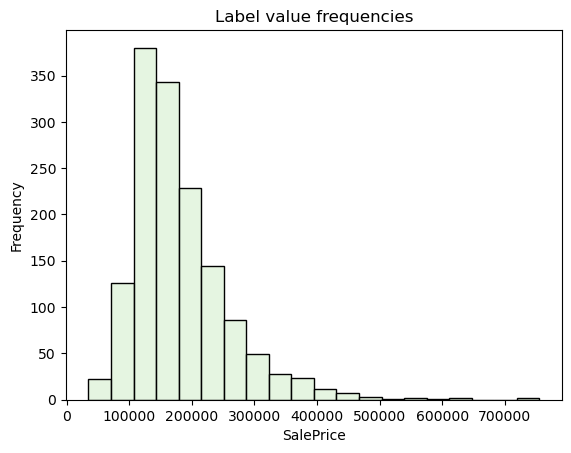

In [89]:
# Curious about those labels!
_ = sns.histplot(train_set['SalePrice'], bins=20)
_ = plt.xlabel('SalePrice')
_ = plt.ylabel('Frequency')
_ = plt.title('Label value frequencies')

# Looks like we have a few outliers!

In [90]:
# Peep those mins and maxes

total_set.describe()

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,729.250086,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,421.393596,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,0.000000,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,729.000000,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.000000,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [91]:
# Let's see those unique value counts...

for column in total_set.columns :
    unique_count = len(total_set[column].unique())
    print('Unique '+str(column)+" values: "+str(unique_count))

Unique index values: 1460
Unique Id values: 2919
Unique MSSubClass values: 16
Unique MSZoning values: 6
Unique LotFrontage values: 129
Unique LotArea values: 1951
Unique Street values: 2
Unique Alley values: 3
Unique LotShape values: 4
Unique LandContour values: 4
Unique Utilities values: 3
Unique LotConfig values: 5
Unique LandSlope values: 3
Unique Neighborhood values: 25
Unique Condition1 values: 9
Unique Condition2 values: 8
Unique BldgType values: 5
Unique HouseStyle values: 8
Unique OverallQual values: 10
Unique OverallCond values: 9
Unique YearBuilt values: 118
Unique YearRemodAdd values: 61
Unique RoofStyle values: 6
Unique RoofMatl values: 8
Unique Exterior1st values: 16
Unique Exterior2nd values: 17
Unique MasVnrType values: 5
Unique MasVnrArea values: 445
Unique ExterQual values: 4
Unique ExterCond values: 5
Unique Foundation values: 6
Unique BsmtQual values: 5
Unique BsmtCond values: 5
Unique BsmtExposure values: 5
Unique BsmtFinType1 values: 7
Unique BsmtFinSF1 values: 992

Step 4: Data Cleaning
---

In [92]:
# Now, what should we do about any missing values? Let's see where they are, first.
null_counts = total_set.isnull().sum()

cols_with_nulls = null_counts[null_counts.values > 0]

cols_with_nulls

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

Looks like there are columns with few nulls and columns with many nulls. We'll revisit this in EDA.

The only one we know for sure how to handle is 'Functional' since the description document specifies that null values there should be imputed as 'Typ'.


In [93]:
for index, row in total_set.iterrows() :
    if type(row['Functional']) != str :
        total_set.loc[index, 'Functional'] = 'Typ'

# Check!
total_set['Functional'].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

Now let's deal with the rest, one by one.

---

MSZoning:

In [94]:
total_set[total_set['MSZoning'].isnull()]

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,set
1915,455,1916,30,NaN,109.0,21780,Grvl,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,3,2009,ConLD,Normal,NaN,test
2216,756,2217,20,NaN,80.0,14584,Pave,NaN,Reg,Low,...,NaN,NaN,NaN,0,2,2008,WD,Abnorml,NaN,test
2250,790,2251,70,NaN,NaN,56600,Pave,NaN,IR1,Low,...,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN,test
2904,1444,2905,20,NaN,125.0,31250,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,5,2006,WD,Normal,NaN,test


They're all in the test set! Let's figure out how to impute them... since it's 'zoning', maybe there's a correlation with lot size? Street type? Let's check.

C:\Users\Josh\AppData\Local\Temp\ipykernel_44808\4139275139.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='MSZoning', y='LotArea', data=test_set, palette='colorblind')
c:\Users\Josh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Josh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Josh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='MSZoning', ylabel='LotArea'>

c:\Users\Josh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Josh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Josh\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


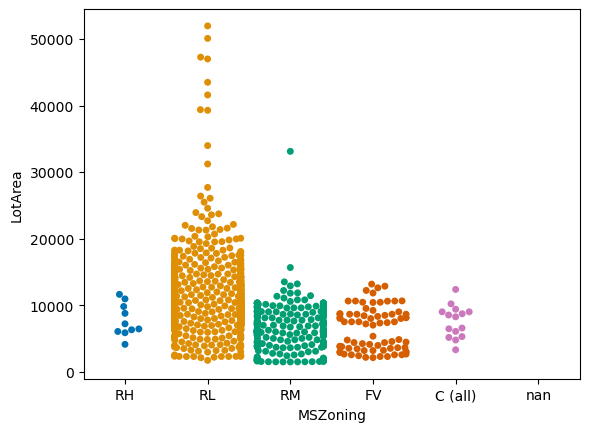

In [129]:
sns.swarmplot(x='MSZoning', y='LotArea', data=test_set, palette='colorblind')

Even the lowest LotArea value of the 4 rows with missing MSZoning values is above all but one outlier for every group except RL. We can reasonably impute RL for these values.

In [96]:
nulls = list(total_set[total_set['MSZoning'].isnull()].index)

for index, row in total_set.iterrows() :
    if index in nulls :
        total_set.loc[index, 'MSZoning'] = 'RL'

---

LotFrontage

Let's get an idea of the column in general first.

<Axes: xlabel='LotFrontage', ylabel='Count'>

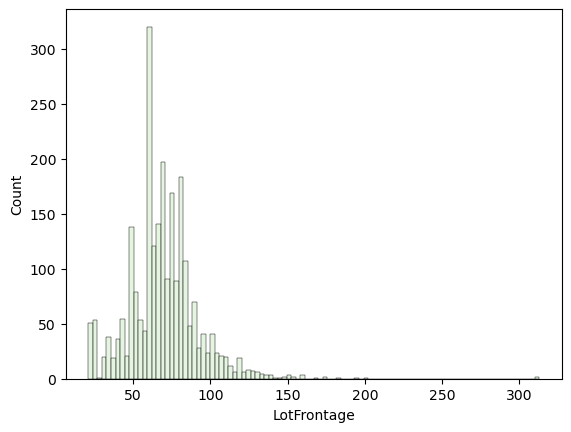

In [97]:
sns.histplot(total_set['LotFrontage'], bins=100)

Looks normal-ish with a right skew and a few overly-popular values

Let's see if those overly-popular values are due to rounding.

In [98]:
total_set['LotFrontage'].value_counts().head(20)

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
90.0      46
78.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
79.0      28
100.0     28
Name: LotFrontage, dtype: int64

Looks like it, for the first 7 values or so (each is a multiple of 5).

I bet LotFrontage is correlated to LotArea and affected by zoning. This might help us more accurately impute values.

<Axes: xlabel='LotArea', ylabel='LotFrontage'>

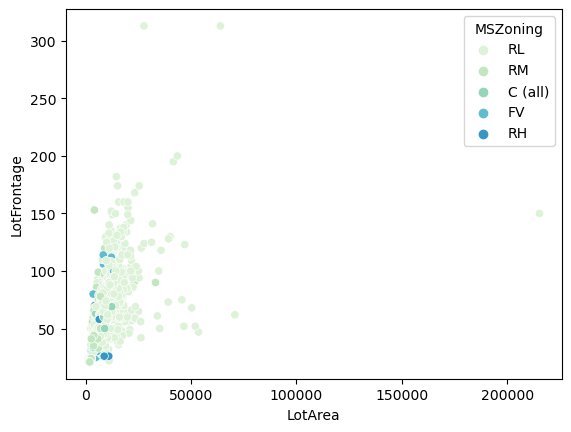

In [99]:
sns.scatterplot(x='LotArea', y='LotFrontage', hue='MSZoning', data=total_set)

At a first glance, it looks like there's a strong correlation and that the varying values are mostly RL, but RL is by far the most common value, so that's possibly to be expected anyway. Let's just impute to the regression.

In [113]:
usables = total_set[~total_set['LotFrontage'].isnull()]

x = usables['LotArea'].values
y = usables['LotFrontage'].values

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
intercept, slope = model.params
print(intercept)
print(slope)
nulls = total_set[total_set['LotFrontage'].isnull()].index

for index in nulls :
    imputed = slope * total_set.loc[index, 'LotArea'] + intercept
    # print(imputed)
    total_set.loc[index, 'LotFrontage'] = imputed

51.99510362506278
0.0017797941237565774


<Axes: xlabel='LotFrontage', ylabel='Count'>

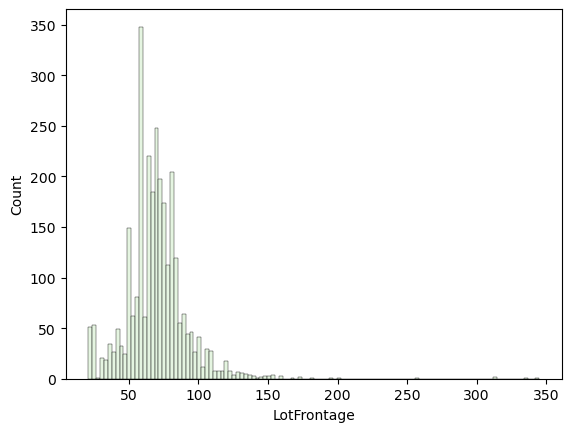

In [117]:
sns.histplot(x='LotFrontage', data=total_set)

---

Alley

<Axes: xlabel='Alley', ylabel='Count'>

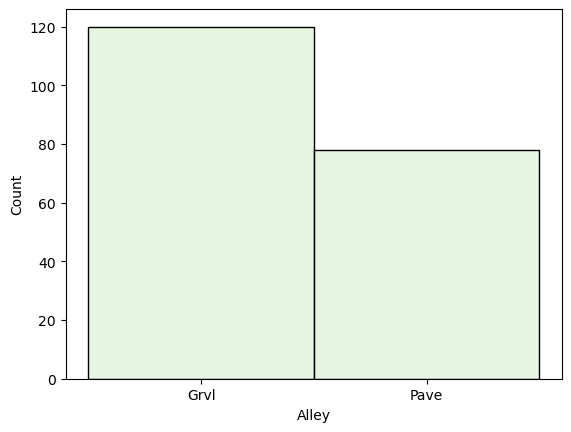

In [118]:
sns.histplot(total_set['Alley'])

So few columns have this feature that if there doesn't seem to be a very strong correlation with price, we should probably just drop it altogether.

C:\Users\Josh\AppData\Local\Temp\ipykernel_44808\888641384.py:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Alley', y='SalePrice', data=total_set, palette='colorblind')


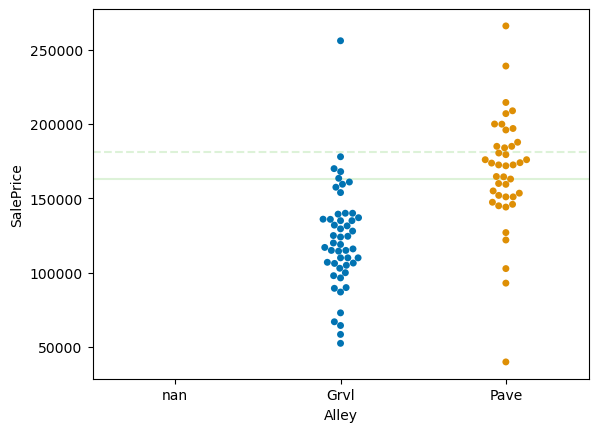

In [128]:
# dict = {'Grvl': 1, 'Pave': 2}

# dummy = train_set[['Alley', 'SalePrice']].replace(dict)

sns.swarmplot(x='Alley', y='SalePrice', data=total_set, palette='colorblind')
plt.axhline(train_set['SalePrice'].mean(), linestyle='--')
plt.axhline(train_set['SalePrice'].median())


It seems like 'Pave' doesn't have a huge effect on SalePrice, but 'Grvl' is clearly correlated with lower prices.

Shall we just drop the Paves, and include Grvl as a binary variable?

Step 4.5: Save and Quit
---

In [9]:
# Re-make our train and test splits including any modifications we may have made above.
step_1_train = total_set[total_set['set']=='train']
step_1_test = total_set[total_set['set']=='test'].drop('SalePrice', axis=1)

# Save and quit.
total_set.to_json('../data/interim/Step 1 - Total Set.json', orient='records')
step_1_train.to_json('../data/interim/Step 1 - Train Set.json', orient='records')
step_1_test.to_json('../data/interim/Step 1 - Test Set.json', orient='records')


In [10]:
# NOTE: The 'Condition1' and 'Condition2' variables are identical.
# Since we're probably going to one-hot encode these later, I might
# roll these into lists (so each property will have a list of 
# 'conditions' that will have a length of either 1 or 2, and then
# we can programmatically one-hot from there. 'Norm will likely be
# excluded.)

# Exterior1st and Exterior2nd CANNOT be treated this way, as there
# is a presumed heirarchy between them.

In [11]:
# NOTE: LowQualFinSF is probably best understood not as a ratio of unfinished
# to finsihed space. We'll engineer that in EDA.

In [12]:
# NOTE: BsmtFullBath can probably be similarly split into "has" and "doesn't",
# as well as another column to indicate how many.

# POTENTIALLY we should consider 'has basement' and 'has basement w/bathroom' as
# two different things... Something to play around with in modeling.

# Same for 3SsnPorch, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Fence, 